In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file_path.csv' with the actual path to your CSV file
ref_path = 'simulations/smc_beta004.csv'
mpc_path = 'simulations/mpc.csv'
pp_path = 'simulations/pp.csv'
test1_path = 'simulations/smc_std_yaw_02.csv'
test2_path = 'simulations/smc_std_yaw_04.csv'
test3_path = 'simulations/smc_std_yaw_08.csv'

# Read the CSV file into a DataFrame
ref_df = pd.read_csv(ref_path, delimiter=',')
mpc_df = pd.read_csv(mpc_path, delimiter=',')
pp_df = pd.read_csv(pp_path, delimiter=',')
test1_df = pd.read_csv(test1_path, delimiter=',')
test2_df = pd.read_csv(test2_path, delimiter=',')
test3_df = pd.read_csv(test3_path, delimiter=',')

# Assign columns to variables for ref_df
ref_time = ref_df['__time']
ref_steer = ref_df['/vehicle/status/steering_status/steering_tire_angle']
ref_lat_err = ref_df['/control_performance/performance_vars/error/lateral_error']
ref_yaw_err = ref_df['/control_performance/performance_vars/error/heading_error']
ref_ctrl_egy = ref_df['/control_performance/performance_vars/error/control_effort_energy']
ref_lat_acc = ref_df['/control_performance/driving_status/lateral_acceleration/data']
ref_lat_jrk = ref_df['/control_performance/driving_status/lateral_jerk/data']
ref_proc_time = ref_df['/control_performance/driving_status/controller_processing_time/data']

ref_x = ref_df['/localization/kinematic_state/pose/pose/position/x']
ref_y = ref_df['/localization/kinematic_state/pose/pose/position/y']
ref_z = ref_df['/localization/kinematic_state/pose/pose/position/z']
ref_vx = ref_df['/localization/kinematic_state/twist/twist/linear/x']
ref_k = ref_df['/control_performance/performance_vars/error/curvature_estimate']

# Assign columns to variables for mpc_df
mpc_time = mpc_df['__time']
mpc_steer = mpc_df['/vehicle/status/steering_status/steering_tire_angle']
mpc_lat_err = mpc_df['/control_performance/performance_vars/error/lateral_error']
mpc_yaw_err = mpc_df['/control_performance/performance_vars/error/heading_error']
mpc_ctrl_egy = mpc_df['/control_performance/performance_vars/error/control_effort_energy']
mpc_lat_acc = mpc_df['/control_performance/driving_status/lateral_acceleration/data']
mpc_lat_jrk = mpc_df['/control_performance/driving_status/lateral_jerk/data']
mpc_proc_time = mpc_df['/control_performance/driving_status/controller_processing_time/data']

mpc_vx = mpc_df['/localization/kinematic_state/twist/twist/linear/x']

# Assign columns to variables for pp_df
pp_time = pp_df['__time']
pp_steer = pp_df['/vehicle/status/steering_status/steering_tire_angle']
pp_lat_err = pp_df['/control_performance/performance_vars/error/lateral_error']
pp_yaw_err = pp_df['/control_performance/performance_vars/error/heading_error']
pp_ctrl_egy = pp_df['/control_performance/performance_vars/error/control_effort_energy']
pp_lat_acc = pp_df['/control_performance/driving_status/lateral_acceleration/data']
pp_lat_jrk = pp_df['/control_performance/driving_status/lateral_jerk/data']
pp_proc_time = pp_df['/control_performance/driving_status/controller_processing_time/data']

pp_vx = pp_df['/localization/kinematic_state/twist/twist/linear/x']

# Assign columns to variables for test1_df
test1_time = test1_df['__time']
test1_steer = test1_df['/vehicle/status/steering_status/steering_tire_angle']
test1_lat_err = test1_df['/control_performance/performance_vars/error/lateral_error']
test1_yaw_err = test1_df['/control_performance/performance_vars/error/heading_error']
test1_ctrl_egy = test1_df['/control_performance/performance_vars/error/control_effort_energy']
test1_lat_acc = test1_df['/control_performance/driving_status/lateral_acceleration/data']
test1_lat_jrk = test1_df['/control_performance/driving_status/lateral_jerk/data']
test1_proc_time = test1_df['/control_performance/driving_status/controller_processing_time/data']

# Assign columns to variables for test2_df
test2_time = test2_df['__time']
test2_steer = test2_df['/vehicle/status/steering_status/steering_tire_angle']
test2_lat_err = test2_df['/control_performance/performance_vars/error/lateral_error']
test2_yaw_err = test2_df['/control_performance/performance_vars/error/heading_error']
test2_ctrl_egy = test2_df['/control_performance/performance_vars/error/control_effort_energy']
test2_lat_acc = test2_df['/control_performance/driving_status/lateral_acceleration/data']
test2_lat_jrk = test2_df['/control_performance/driving_status/lateral_jerk/data']
test2_proc_time = test2_df['/control_performance/driving_status/controller_processing_time/data']

# Assign columns to variables for test3_df
test3_time = test3_df['__time']
test3_steer = test3_df['/vehicle/status/steering_status/steering_tire_angle']
test3_lat_err = test3_df['/control_performance/performance_vars/error/lateral_error']
test3_yaw_err = test3_df['/control_performance/performance_vars/error/heading_error']
test3_ctrl_egy = test3_df['/control_performance/performance_vars/error/control_effort_energy']
test3_lat_acc = test3_df['/control_performance/driving_status/lateral_acceleration/data']
test3_lat_jrk = test3_df['/control_performance/driving_status/lateral_jerk/data']
test3_proc_time = test3_df['/control_performance/driving_status/controller_processing_time/data']

def filter_and_displace(time, data, t_start, t_end, displacement=0):
    # Ensure data and time are the same length
    min_length = min(len(time), len(data))
    time = time[:min_length]
    data = data[:min_length]
    # Remove NaNs from data and time
    valid_indices = np.where(~np.isnan(data))[0]
    if valid_indices.size > 0:
        time = np.ravel(time[valid_indices])
        time -= time[0] + displacement
        data = np.ravel(data[valid_indices])
        mask = (time >= t_start) & (time <= t_end)
        time = time[mask]
        data = data[mask]
    else:
        time = np.array([])
        data = np.array([])
    return time, data

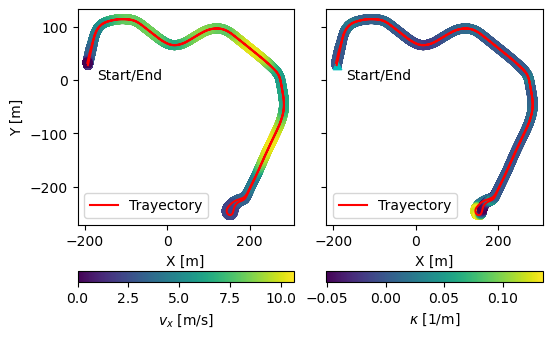

In [3]:
t_start = 0
t_end = 290

ref_time_x, ref_x_filt = filter_and_displace(ref_time, ref_x, t_start, t_end)
ref_time_y, ref_y_filt = filter_and_displace(ref_time, ref_y, t_start, t_end)
ref_time_z, ref_z_filt = filter_and_displace(ref_time, ref_z, t_start, t_end)
ref_time_vx, ref_vx_filt = filter_and_displace(ref_time, ref_vx, t_start, t_end)
ref_time_k, ref_k_filt = filter_and_displace(ref_time, ref_k, t_start, t_end)

mpc_time_vx, mpc_vx_filt = filter_and_displace(mpc_time, mpc_vx, t_start, t_end)
pp_time_vx, pp_vx_filt = filter_and_displace(pp_time, pp_vx, t_start, t_end)

# plot two subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 4))

axs[0].plot(ref_x_filt, ref_y_filt, 'r')
c = axs[0].scatter(ref_x_filt, ref_y_filt, c=ref_vx_filt, cmap='viridis')
fig.colorbar(c, ax=axs[0], label='$v_x$ [m/s]', orientation='horizontal')
# axs[0].set_xticklabels([])  # Remove x-axis tick labels
axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Y [m]')
axs[0].legend(['Trayectory'])

axs[1].plot(ref_x_filt, ref_y_filt, 'r')
c = axs[1].scatter(ref_x_filt, ref_y_filt, c=ref_k_filt, cmap='viridis')
fig.colorbar(c, ax=axs[1], label='$\kappa$ [1/m]', orientation='horizontal')
axs[1].set_yticklabels([])  # Remove y-axis tick labels
axs[1].set_xlabel('X [m]')
# axs[1].set_ylabel('Y [m]')
axs[1].legend(['Trayectory'])

# Add a green triangle at the start point
axs[1].scatter(ref_x_filt[0], ref_y_filt[0], color='c', marker='^')

# Annotate the start point
axs[0].annotate('Start/End', (ref_x_filt[0], ref_y_filt[0]), textcoords="offset points", xytext=(30,-10), ha='center')
axs[1].annotate('Start/End', (ref_x_filt[0], ref_y_filt[0]), textcoords="offset points", xytext=(30,-10), ha='center')

# Adjust subplot parameters
plt.subplots_adjust(wspace=0.15, hspace=0.1)

# Show the figure
plt.show()

# # Create figure and 3D axes
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot first bar graph in the first y-plane
# scat1 = ax.scatter(ref_x_filt, np.zeros_like(ref_x_filt), ref_y_filt, c=ref_vx_filt, cmap='viridis')
# cbar1 = fig.colorbar(scat1, ax=ax, pad=0.05, label='$v_x$ [m/s]', shrink=0.5, orientation='horizontal')
# ax.scatter(ref_x_filt, np.zeros_like(ref_x_filt), ref_y_filt, c='r', s=0.01)

# # Plot second bar graph in the second y-plane
# scat2 = ax.scatter(ref_x_filt, np.ones_like(ref_x_filt), ref_y_filt, c=ref_k_filt, cmap='viridis')
# cbar2 = fig.colorbar(scat2, ax=ax, pad=0.1, label='$\kappa$ [1/m]', shrink=0.5, orientation='horizontal')
# ax.scatter(ref_x_filt, np.ones_like(ref_x_filt), ref_y_filt, c='r', s=0.01)

# # Set labels and title
# ax.set_xlabel('X [m]')
# ax.set_zlabel('Y [m]')
# ax.set_ylim([-0.1, 1.1])
# ax.set_yticks([-0.1, 1.1])
# ax.set_yticklabels(['$v_x$', '$\kappa$'])

# # Show plot
# plt.show()

In [4]:
def create_combined_legend(ax1, ax2):
    handles, labels = [], []
    for ax in [ax1, ax2]:
        for h, l in zip(*ax.get_legend_handles_labels()):
            handles.append(h)
            labels.append(l)
    legend = ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1.35), ncol=2)
    ax1.add_artist(legend)
    ax1.grid(True, linestyle='dotted')

1747.0883320697103


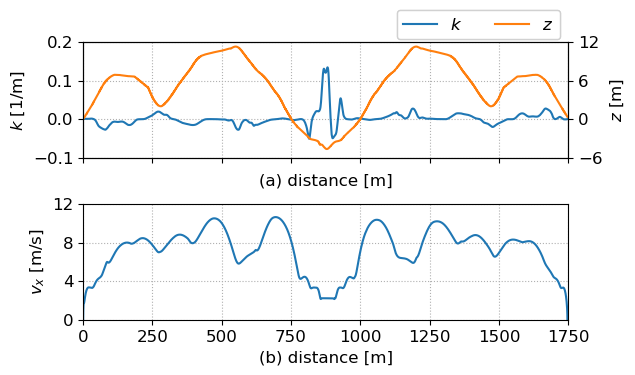

In [5]:
# Calculate distance array considering speed and time
ref_dist = np.zeros_like(ref_vx_filt)
mpc_dist = np.zeros_like(mpc_vx_filt)
pp_dist = np.zeros_like(pp_vx_filt)
for i in range(1, len(ref_vx_filt)):
    ref_dist[i] = ref_dist[i-1] + ref_vx_filt[i] * (ref_time_vx[i] - ref_time_vx[i-1])
for i in range(1, len(mpc_vx_filt)):
    mpc_dist[i] = mpc_dist[i-1] + mpc_vx_filt[i] * (mpc_time_vx[i] - mpc_time_vx[i-1])
for i in range(1, len(pp_vx_filt)):
    pp_dist[i] = pp_dist[i-1] + pp_vx_filt[i] * (pp_time_vx[i] - pp_time_vx[i-1])

print(ref_dist[-1])

# Set the fontsize to 10
plt.rcParams.update({'font.size': 12})

fig, (ax2, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(14/2.54, 8.5/2.54))
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

ax1.plot(ref_dist, ref_vx_filt, label='$k$', color='#1f77b4')
ax1.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax1.set_xlabel('(b) distance [m]')
ax1.set_ylabel('$v_x$ [m/s]')
# ax1.set_xticklabels([])  # Remove x-axis tick labels
ax1.set_xlim([0, round(ref_dist[-1])])
ax1.set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
ax1.set_ylim([0, 12])
ax1.set_yticks([0, 4, 8, 12])
ax1.grid(True, linestyle='dotted')

ax2.plot(ref_dist, ref_k_filt, label='$k$', color='#1f77b4')
ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax2.set_xlabel('(a) distance [m]')
ax2.set_ylabel('$k$ [1/m]')
ax2.set_xticklabels([])  # Remove x-axis tick labels
ax2.set_xlim([0, round(ref_dist[-1])])
ax2.set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
ax2.set_ylim([-0.1, 0.2])
ax2.set_yticks([-0.1, 0, 0.1, 0.2])
_ax2 = ax2.twinx()
_ax2.plot(ref_dist, ref_z_filt-ref_z_filt[0], label='$z$', color='#ff7f0e')
_ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
_ax2.set_ylabel('$z$ [m]')
_ax2.set_xlim([0, round(ref_dist[-1])])
_ax2.set_xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
_ax2.set_ylim([-6, 12])
_ax2.set_yticks([-6, 0, 6, 12])
create_combined_legend(ax2, _ax2)



In [6]:
displacement_mpc = 4
displacement_pp = 10
displacement_test1 = 0
displacement_test2 = 0
displacement_test3 = 0

ref_time_steer, ref_steer_filt = filter_and_displace(ref_time, ref_steer, t_start, t_end)
ref_time_lat, ref_lat_err_filt = filter_and_displace(ref_time, ref_lat_err, t_start, t_end)
ref_time_yaw, ref_yaw_err_filt = filter_and_displace(ref_time, ref_yaw_err, t_start, t_end)
ref_time_acc, ref_lat_acc_filt = filter_and_displace(ref_time, ref_lat_acc, t_start, t_end)
ref_time_jrk, ref_lat_jrk_filt = filter_and_displace(ref_time, ref_lat_jrk, t_start, t_end)
ref_time_egy, ref_ctrl_egy_filt = filter_and_displace(ref_time, ref_ctrl_egy, t_start, t_end)
ref_time_proc, ref_proc_time_filt = filter_and_displace(ref_time, ref_proc_time, t_start, t_end)

mpc_time_steer, mpc_steer_filt = filter_and_displace(mpc_time, mpc_steer, t_start, t_end, displacement_mpc)
mpc_time_lat, mpc_lat_err_filt = filter_and_displace(mpc_time, mpc_lat_err, t_start, t_end, displacement_mpc)
mpc_time_yaw, mpc_yaw_err_filt = filter_and_displace(mpc_time, mpc_yaw_err, t_start, t_end, displacement_mpc)
mpc_time_acc, mpc_lat_acc_filt = filter_and_displace(mpc_time, mpc_lat_acc, t_start, t_end, displacement_mpc)
mpc_time_jrk, mpc_lat_jrk_filt = filter_and_displace(mpc_time, mpc_lat_jrk, t_start, t_end, displacement_mpc)
mpc_time_egy, mpc_ctrl_egy_filt = filter_and_displace(mpc_time, mpc_ctrl_egy, t_start, t_end, displacement_mpc)
mpc_time_proc, mpc_proc_time_filt = filter_and_displace(mpc_time, mpc_proc_time, t_start, t_end, displacement_mpc)

pp_time_steer, pp_steer_filt = filter_and_displace(pp_time, pp_steer, t_start, t_end, displacement_pp)
pp_time_lat, pp_lat_err_filt = filter_and_displace(pp_time, pp_lat_err, t_start, t_end, displacement_pp)
pp_time_yaw, pp_yaw_err_filt = filter_and_displace(pp_time, pp_yaw_err, t_start, t_end, displacement_pp)
pp_time_acc, pp_lat_acc_filt = filter_and_displace(pp_time, pp_lat_acc, t_start, t_end, displacement_pp)
pp_time_jrk, pp_lat_jrk_filt = filter_and_displace(pp_time, pp_lat_jrk, t_start, t_end, displacement_pp)
pp_time_egy, pp_ctrl_egy_filt = filter_and_displace(pp_time, pp_ctrl_egy, t_start, t_end, displacement_pp)
pp_time_proc, pp_proc_time_filt = filter_and_displace(pp_time, pp_proc_time, t_start, t_end, displacement_pp)

test1_time_steer, test1_steer_filt = filter_and_displace(test1_time, test1_steer, t_start, t_end, displacement_test1)
test1_time_lat, test1_lat_err_filt = filter_and_displace(test1_time, test1_lat_err, t_start, t_end, displacement_test1)
test1_time_yaw, test1_yaw_err_filt = filter_and_displace(test1_time, test1_yaw_err, t_start, t_end, displacement_test1)
test1_time_acc, test1_lat_acc_filt = filter_and_displace(test1_time, test1_lat_acc, t_start, t_end, displacement_test1)
test1_time_jrk, test1_lat_jrk_filt = filter_and_displace(test1_time, test1_lat_jrk, t_start, t_end, displacement_test1)
test1_time_egy, test1_ctrl_egy_filt = filter_and_displace(test1_time, test1_ctrl_egy, t_start, t_end, displacement_test1)
test1_time_proc, test1_proc_time_filt = filter_and_displace(test1_time, test1_proc_time, t_start, t_end, displacement_test1)

test2_time_steer, test2_steer_filt = filter_and_displace(test2_time, test2_steer, t_start, t_end, displacement_test2)
test2_time_lat, test2_lat_err_filt = filter_and_displace(test2_time, test2_lat_err, t_start, t_end, displacement_test2)
test2_time_yaw, test2_yaw_err_filt = filter_and_displace(test2_time, test2_yaw_err, t_start, t_end, displacement_test2)
test2_time_acc, test2_lat_acc_filt = filter_and_displace(test2_time, test2_lat_acc, t_start, t_end, displacement_test2)
test2_time_jrk, test2_lat_jrk_filt = filter_and_displace(test2_time, test2_lat_jrk, t_start, t_end, displacement_test2)
test2_time_egy, test2_ctrl_egy_filt = filter_and_displace(test2_time, test2_ctrl_egy, t_start, t_end, displacement_test2)
test2_time_proc, test2_proc_time_filt = filter_and_displace(test2_time, test2_proc_time, t_start, t_end, displacement_test2)

test3_time_steer, test3_steer_filt = filter_and_displace(test3_time, test3_steer, t_start, t_end, displacement_test3)
test3_time_lat, test3_lat_err_filt = filter_and_displace(test3_time, test3_lat_err, t_start, t_end, displacement_test3)
test3_time_yaw, test3_yaw_err_filt = filter_and_displace(test3_time, test3_yaw_err, t_start, t_end, displacement_test3)
test3_time_acc, test3_lat_acc_filt = filter_and_displace(test3_time, test3_lat_acc, t_start, t_end, displacement_test3)
test3_time_jrk, test3_lat_jrk_filt = filter_and_displace(test3_time, test3_lat_jrk, t_start, t_end, displacement_test3)
test3_time_egy, test3_ctrl_egy_filt = filter_and_displace(test3_time, test3_ctrl_egy, t_start, t_end, displacement_test3)
test3_time_proc, test3_proc_time_filt = filter_and_displace(test3_time, test3_proc_time, t_start, t_end, displacement_test3)

# # # Set the fontsize to 10
# plt.rcParams.update({'font.size': 12})

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14/2.54, 9.5/2.54))
# plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

# ax1.plot(ref_time_lat, ref_lat_err_filt, label='$e_y$', color='#1f77b4')
# ax1.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# ax1.set_xlabel('(a) time [s]')
# ax1.set_ylabel('$e_y$ [m]')
# ax1.set_xticklabels([])  # Remove x-axis tick labels
# ax1.set_xlim([0, 290])
# ax1.set_xticks([0, 58, 116, 174, 232, 290])
# ax1.set_ylim([-0.2, 0.2])
# ax1.set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
# _ax1 = ax1.twinx()
# _ax1.plot(ref_time_yaw, ref_yaw_err_filt, label='$e_\psi$', color='#ff7f0e')
# _ax1.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# _ax1.set_ylabel('$e_\psi$ [rad]')
# _ax1.set_xlim([0, 290])
# _ax1.set_xticks([0, 58, 116, 174, 232, 290])
# _ax1.set_ylim([-0.06, 0.06])
# _ax1.set_yticks([-0.06, -0.03, 0, 0.03, 0.06])
# create_combined_legend(ax1, _ax1)

# ax2.plot(ref_time_jrk, ref_lat_jrk_filt, label='$j_y$', color='#1f77b4')
# ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# ax2.set_xlabel('(b) time [s]')
# ax2.set_ylabel('$j_y$ [m/s$^3$]')
# ax2.set_xlim([0, 290])
# ax2.set_xticks([0, 58, 116, 174, 232, 290])
# ax2.set_ylim([-2.6, 2.6])
# ax2.set_yticks([-2.6, -1.3, 0, 1.3, 2.6])
# _ax2 = ax2.twinx()
# _ax2.plot(ref_time_steer, ref_steer_filt, label='$\delta$', color='#ff7f0e')
# _ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# _ax2.set_ylabel('$\delta$ [rad]')
# _ax2.set_xlim([0, 290])
# _ax2.set_xticks([0, 58, 116, 174, 232, 290])
# _ax2.set_ylim([-0.6, 0.6])
# _ax2.set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
# create_combined_legend(ax2, _ax2)


169.047522
84.967141
128.808479


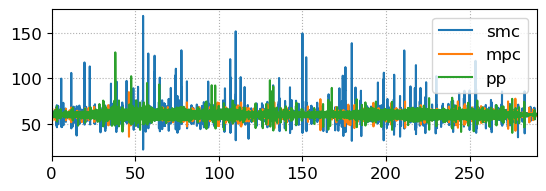

In [7]:
from statistics import mean

# Set the fontsize to 10
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(14/2.54, 4.5/2.54))
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

plt.plot(ref_time_proc, ref_proc_time_filt, label='smc', color='#1f77b4')
plt.plot(mpc_time_proc, mpc_proc_time_filt, label='mpc', color='#ff7f0e')
plt.plot(pp_time_proc, pp_proc_time_filt, label='pp', color='#2ca02c')
plt.xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
plt.grid(True, linestyle='dotted')
plt.legend()

print(max(ref_proc_time_filt))
print(max(mpc_proc_time_filt))
print(max(pp_proc_time_filt))

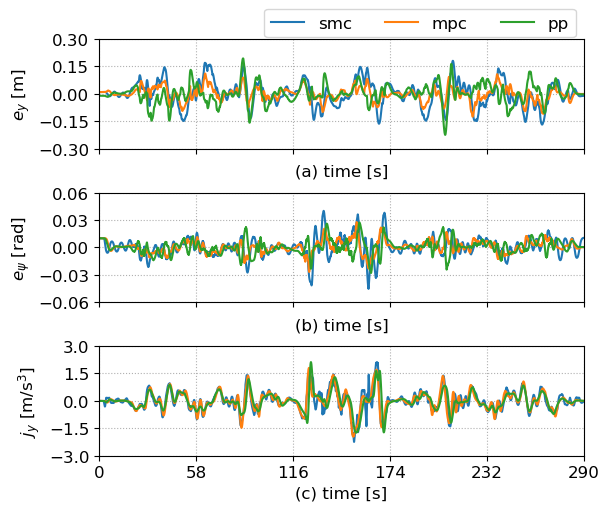

In [8]:
# Set the fontsize to 10
plt.rcParams.update({'font.size': 12})

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14/2.54, 12.75/2.54))
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

ax1.plot(ref_time_lat, ref_lat_err_filt, label='smc')
ax1.plot(mpc_time_lat, mpc_lat_err_filt, label='mpc')
ax1.plot(pp_time_lat, -pp_lat_err_filt, label='pp')
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1.35), ncol=4)
ax1.set_xlabel('(a) time [s]')
ax1.set_ylabel('$e_y$ [m]')
ax1.set_xticklabels([])  # Remove x-axis tick labels
ax1.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax1.set_xticks([0, 58, 116, 174, 232, 290])
ax1.set_ylim([-0.3, 0.3])
ax1.set_yticks([-0.3, -0.15, 0, 0.15, 0.3])
# ax1.legend(loc='upper right', bbox_to_anchor=(1, 1.35), ncol=4)
ax1.grid(True, linestyle='dotted')

ax2.plot(ref_time_yaw, ref_yaw_err_filt, label='smc')
ax2.plot(mpc_time_yaw, mpc_yaw_err_filt, label='mpc')
ax2.plot(pp_time_yaw, pp_yaw_err_filt, label='pp')
ax2.set_xlabel('(b) time [s]')
ax2.set_ylabel('$e_\psi$ [rad]')
ax2.set_xticklabels([])  # Remove x-axis tick labels
ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax2.set_xticks([0, 58, 116, 174, 232, 290])
ax2.set_ylim([-0.06, 0.06])
ax2.set_yticks([-0.06, -0.03, 0, 0.03, 0.06])
ax2.grid(True, linestyle='dotted')

ax3.plot(ref_time_jrk, ref_lat_jrk_filt, label='smc')
ax3.plot(mpc_time_jrk, mpc_lat_jrk_filt, label='mpc')
ax3.plot(pp_time_jrk, pp_lat_jrk_filt, label='pp')
ax3.set_xlabel('(c) time [s]')
ax3.set_ylabel('$j_y$ [m/s$^3$]')
ax3.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax3.set_xticks([0, 58, 116, 174, 232, 290])
ax3.set_ylim([-3, 3])
ax3.set_yticks([-3, -1.5, 0, 1.5, 3])
ax3.grid(True, linestyle='dotted')

In [9]:
# # Set the fontsize to 10
# plt.rcParams.update({'font.size': 12})

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14/2.54, 8.5/2.54))
# plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

# ax1.plot(test3_time_lat, test3_lat_err_filt, label='0.08')
# ax1.plot(test2_time_lat, test2_lat_err_filt, label='0.04')
# ax1.plot(test1_time_lat, test1_lat_err_filt, label='0.02')
# ax1.plot(ref_time_lat, ref_lat_err_filt, label='ref')
# ax1.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# ax1.set_xlabel('(a) time [s]')
# ax1.set_ylabel('$e_y$ [m]')
# ax1.set_xticklabels([])  # Remove x-axis tick labels
# ax1.set_xlim([0, 290])
# ax1.set_xticks([0, 58, 116, 174, 232, 290])
# ax1.set_ylim([-0.7, 0.7])
# ax1.set_yticks([-0.7, -0.35, 0, 0.35, 0.7])
# ax1.legend(loc='upper right', bbox_to_anchor=(1, 1.35), ncol=4)
# ax1.grid(True, linestyle='dotted')

# ax2.plot(test3_time_yaw, test3_yaw_err_filt, label='0.08')
# ax2.plot(test2_time_yaw, test2_yaw_err_filt, label='0.04')
# ax2.plot(test1_time_yaw, test1_yaw_err_filt, label='0.02')
# ax2.plot(ref_time_yaw, ref_yaw_err_filt, label='ref')
# ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# ax2.set_xlabel('(b) time [s]')
# ax2.set_ylabel('$e_\psi$ [rad]')
# ax2.set_xlim([0, 290])
# ax2.set_xticks([0, 58, 116, 174, 232, 290])
# ax2.set_ylim([-0.1, 0.1])
# ax2.set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
# ax2.grid(True, linestyle='dotted')

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14/2.54, 8.3/2.54))
# plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

# ax1.plot(test3_time_jrk, test3_lat_jrk_filt, label='0.08')
# ax1.plot(test2_time_jrk, test2_lat_jrk_filt, label='0.04')
# ax1.plot(test1_time_jrk, test1_lat_jrk_filt, label='0.02')
# ax1.plot(ref_time_jrk, ref_lat_jrk_filt, label='ref')
# ax1.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# ax1.set_xlabel('(a) time [s]')
# ax1.set_ylabel('$j_y$ [m/s$^3$]')
# ax1.set_xticklabels([])  # Remove x-axis tick labels
# ax1.set_xlim([0, 290])
# ax1.set_xticks([0, 58, 116, 174, 232, 290])
# ax1.set_ylim([-8, 8])
# ax1.set_yticks([-8, -4, 0, 4, 8])
# ax1.legend(loc='upper right', bbox_to_anchor=(1, 1.35), ncol=4)
# ax1.grid(True, linestyle='dotted')

# ax2.plot(test3_time_steer, test3_steer_filt, label='0.08')
# ax2.plot(test2_time_steer, test2_steer_filt, label='0.04')
# ax2.plot(test1_time_steer, test1_steer_filt, label='0.02')
# ax2.plot(ref_time_steer, ref_steer_filt, label='ref')
# ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
# ax2.set_xlabel('(b) time [s]')
# ax2.set_ylabel('$\delta$ [rad]')
# ax2.set_xlim([0, 290])
# ax2.set_xticks([0, 58, 116, 174, 232, 290])
# ax2.set_ylim([-0.6, 0.6])
# ax2.set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
# ax2.grid(True, linestyle='dotted')

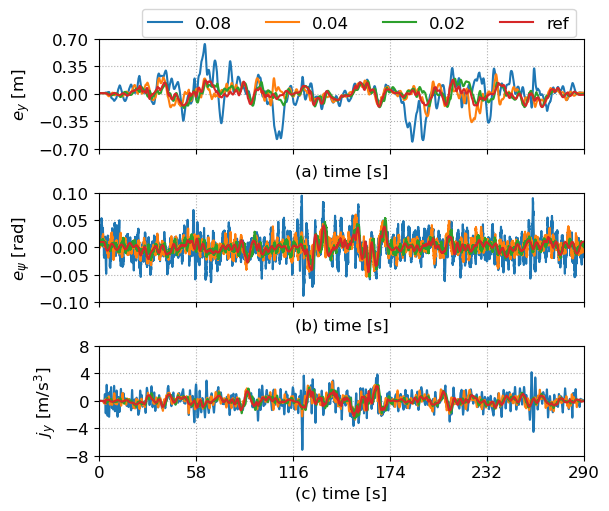

In [10]:
# Set the fontsize to 10
plt.rcParams.update({'font.size': 12})

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14/2.54, 12.75/2.54))
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

ax1.plot(test3_time_lat, test3_lat_err_filt, label='0.08')
ax1.plot(test2_time_lat, test2_lat_err_filt, label='0.04')
ax1.plot(test1_time_lat, test1_lat_err_filt, label='0.02')
ax1.plot(ref_time_lat, ref_lat_err_filt, label='ref')
ax1.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax1.set_xlabel('(a) time [s]')
ax1.set_ylabel('$e_y$ [m]')
ax1.set_xticklabels([])  # Remove x-axis tick labels
ax1.set_xlim([0, 290])
ax1.set_xticks([0, 58, 116, 174, 232, 290])
ax1.set_ylim([-0.7, 0.7])
ax1.set_yticks([-0.7, -0.35, 0, 0.35, 0.7])
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1.35), ncol=4)
ax1.grid(True, linestyle='dotted')

ax2.plot(test3_time_yaw, test3_yaw_err_filt, label='0.08')
ax2.plot(test2_time_yaw, test2_yaw_err_filt, label='0.04')
ax2.plot(test1_time_yaw, test1_yaw_err_filt, label='0.02')
ax2.plot(ref_time_yaw, ref_yaw_err_filt, label='ref')
ax2.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax2.set_xlabel('(b) time [s]')
ax2.set_ylabel('$e_\psi$ [rad]')
ax2.set_xticklabels([])  # Remove x-axis tick labels
ax2.set_xlim([0, 290])
ax2.set_xticks([0, 58, 116, 174, 232, 290])
ax2.set_ylim([-0.1, 0.1])
ax2.set_yticks([-0.1, -0.05, 0, 0.05, 0.1])
ax2.grid(True, linestyle='dotted')

ax3.plot(test3_time_jrk, test3_lat_jrk_filt, label='0.08')
ax3.plot(test2_time_jrk, test2_lat_jrk_filt, label='0.04')
ax3.plot(test1_time_jrk, test1_lat_jrk_filt, label='0.02')
ax3.plot(ref_time_jrk, ref_lat_jrk_filt, label='ref')
ax3.set_xlim(t_start, t_end)  # Set x-axis limits to start at t_start seconds and end at t_end seconds
ax3.set_xlabel('(c) time [s]')
ax3.set_ylabel('$j_y$ [m/s$^3$]')
ax3.set_xlim([0, 290])
ax3.set_xticks([0, 58, 116, 174, 232, 290])
ax3.set_ylim([-8, 8])
ax3.set_yticks([-8, -4, 0, 4, 8])
ax3.grid(True, linestyle='dotted')


+-----+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+--------+--------+
|     | e_y    |        |        |        | e_psi  |        |        |         | j_y     |         |        |        |
+-----+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+--------+--------+
|     | ref    | test1  | test2  | test3  | ref    | test1  | test2  | test3   | ref     | test1   | test2  | test3  |
+-----+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+--------+--------+
| Med | 0.001  | 0.0064 | 0.0077 | 0.0178 | 0.0007 | 0.0004 | 0.0007 | -0.0002 | -0.0181 | -0.0058 | 0.0195 | 0.0094 |
+-----+--------+--------+--------+--------+--------+--------+--------+---------+---------+---------+--------+--------+
| IQR | 0.04   | 0.0448 | 0.0496 | 0.0892 | 0.0054 | 0.0066 | 0.0093 | 0.0138  | 0.2981  | 0.3237  | 0.4028 | 0.6534 |
+-----+--------+--------+--------+--------+-----

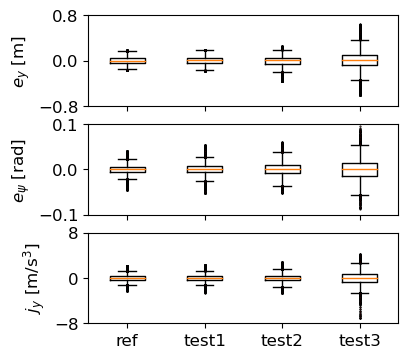

In [15]:
from tabulate import tabulate

flierprops = dict(marker='.', markerfacecolor='red', markersize=1, linestyle='none')

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(4, 4))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

lat_err_boxplot_dict = axs[0].boxplot([ref_lat_err_filt, test1_lat_err_filt, test2_lat_err_filt, test3_lat_err_filt], flierprops=flierprops)
axs[0].set_xticklabels([])
axs[0].set_ylabel('$e_y$ [m]')
axs[0].set_ylim([-0.8, 0.8])
axs[0].set_yticks([-0.8, 0, 0.8])

yaw_err_boxplot_dict = axs[1].boxplot([ref_yaw_err_filt, test1_yaw_err_filt, test2_yaw_err_filt, test3_yaw_err_filt], flierprops=flierprops)
axs[1].set_xticklabels([])
axs[1].set_ylabel('$e_\psi$ [rad]')
axs[1].set_ylim([-0.1, 0.1])

lat_jrk_boxplot_dict = axs[2].boxplot([ref_lat_jrk_filt, test1_lat_jrk_filt, test2_lat_jrk_filt, test3_lat_jrk_filt], flierprops=flierprops)
axs[2].set_ylabel('$j_y$ [m/s$^3$]')
axs[2].set_ylim([-8, 8])
axs[2].set_yticks([-8, 0, 8])
axs[2].set_xticklabels(['ref', 'test1', 'test2', 'test3'])
# axs[2].set_xticklabels(['ref', '0.005', '0.01', '0.02'])
# axs[2].set_xlabel('                  (e)')

def extract_boxplot_values(boxplot_dict, index):
    median = boxplot_dict['medians'][index].get_ydata()[0]
    iqr = (boxplot_dict['boxes'][index].get_ydata()[2] - boxplot_dict['boxes'][index].get_ydata()[0]) / 2
    wr = (boxplot_dict['caps'][index*2+1].get_ydata()[0] - boxplot_dict['caps'][index*2].get_ydata()[0]) / 2
    max_val = max(abs(boxplot_dict['fliers'][index].get_ydata()))
    return median, iqr, wr, max_val

ref_lat_err_median, ref_lat_err_iqr, ref_lat_err_wr, ref_lat_err_max = extract_boxplot_values(lat_err_boxplot_dict, 0)
test1_lat_err_median, test1_lat_err_iqr, test1_lat_err_wr, test1_lat_err_max = extract_boxplot_values(lat_err_boxplot_dict, 1)
test2_lat_err_median, test2_lat_err_iqr, test2_lat_err_wr, test2_lat_err_max = extract_boxplot_values(lat_err_boxplot_dict, 2)
test3_lat_err_median, test3_lat_err_iqr, test3_lat_err_wr, test3_lat_err_max = extract_boxplot_values(lat_err_boxplot_dict, 3)

ref_yaw_err_median, ref_yaw_err_iqr, ref_yaw_err_wr, ref_yaw_err_max = extract_boxplot_values(yaw_err_boxplot_dict, 0)
test1_yaw_err_median, test1_yaw_err_iqr, test1_yaw_err_wr, test1_yaw_err_max = extract_boxplot_values(yaw_err_boxplot_dict, 1)
test2_yaw_err_median, test2_yaw_err_iqr, test2_yaw_err_wr, test2_yaw_err_max = extract_boxplot_values(yaw_err_boxplot_dict, 2)
test3_yaw_err_median, test3_yaw_err_iqr, test3_yaw_err_wr, test3_yaw_err_max = extract_boxplot_values(yaw_err_boxplot_dict, 3)

ref_lat_jrk_median, ref_lat_jrk_iqr, ref_lat_jrk_wr, ref_lat_jrk_max = extract_boxplot_values(lat_jrk_boxplot_dict, 0)
test1_lat_jrk_median, test1_lat_jrk_iqr, test1_lat_jrk_wr, test1_lat_jrk_max = extract_boxplot_values(lat_jrk_boxplot_dict, 1)
test2_lat_jrk_median, test2_lat_jrk_iqr, test2_lat_jrk_wr, test2_lat_jrk_max = extract_boxplot_values(lat_jrk_boxplot_dict, 2)
test3_lat_jrk_median, test3_lat_jrk_iqr, test3_lat_jrk_wr, test3_lat_jrk_max = extract_boxplot_values(lat_jrk_boxplot_dict, 3)


# Create the table
table = [['','', 'Med', 'IQR', 'WR', 'max'],
         ['e_y','ref', ref_lat_err_median, ref_lat_err_iqr, ref_lat_err_wr, ref_lat_err_max],
         ['','test1', test1_lat_err_median, test1_lat_err_iqr, test1_lat_err_wr, test1_lat_err_max],
         ['','test2', test2_lat_err_median, test2_lat_err_iqr, test2_lat_err_wr, test2_lat_err_max],
         ['','test3', test3_lat_err_median, test3_lat_err_iqr, test3_lat_err_wr, test3_lat_err_max],
         ['e_psi','ref', ref_yaw_err_median, ref_yaw_err_iqr, ref_yaw_err_wr, ref_yaw_err_max],
         ['','test1', test1_yaw_err_median, test1_yaw_err_iqr, test1_yaw_err_wr, test1_yaw_err_max],
         ['','test2', test2_yaw_err_median, test2_yaw_err_iqr, test2_yaw_err_wr, test2_yaw_err_max],
         ['','test3', test3_yaw_err_median, test3_yaw_err_iqr, test3_yaw_err_wr, test3_yaw_err_max],
         ['j_y','ref', ref_lat_jrk_median, ref_lat_jrk_iqr, ref_lat_jrk_wr, ref_lat_jrk_max],
         ['','test1', test1_lat_jrk_median, test1_lat_jrk_iqr, test1_lat_jrk_wr, test1_lat_jrk_max],
         ['','test2', test2_lat_jrk_median, test2_lat_jrk_iqr, test2_lat_jrk_wr, test2_lat_jrk_max],
         ['','test3', test3_lat_jrk_median, test3_lat_jrk_iqr, test3_lat_jrk_wr, test3_lat_jrk_max]]

# Round the decimals to 4
for i in range(1, len(table)):
    for j in range(1, len(table[i])):
        try:
            table[i][j] = round(float(table[i][j]), 4)
        except ValueError:
            pass

# Transpose the table
transposed_table = np.transpose(table)

# Print the transposed table
print(tabulate(transposed_table, tablefmt='grid'))


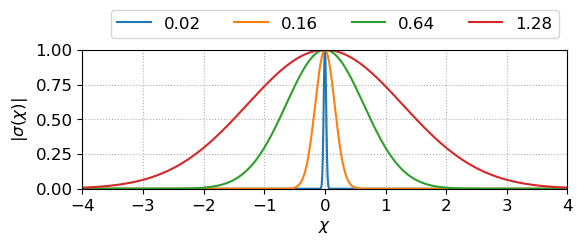

In [12]:
# Set the fontsize to 10
plt.rcParams.update({'font.size': 12})

# Define the parameters
mu = 0 # Mean
sigma_values = [0.02, 0.16, 0.64, 1.28]  # List of different sigma values

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(14/2.54, 4.25/2.54))
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

# Generate data points for each sigma value
x = np.linspace(-5.0, 5.0, 1000)  # Range of x values
for sigma in sigma_values:
    pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))  # Gaussian distribution formula

    # Plot the Gaussian distribution for each sigma value
    plt.plot(x, pdf/max(pdf), label=f'{sigma}')

# Add labels and title
plt.xlabel('$\chi$')
plt.ylabel('$|\sigma(\chi)|$')
plt.xlim([-4, 4])
plt.ylim([0, 1])
# plt.title('Gaussian Distributions with Different Sigma Values')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.35), ncol=4)
plt.grid(True, linestyle='dotted')

# # Set y-axis to logarithmic scale
# plt.yscale('log')
# plt.ylim(0, 10)  # Set y-axis limits

# Show plot
plt.show()

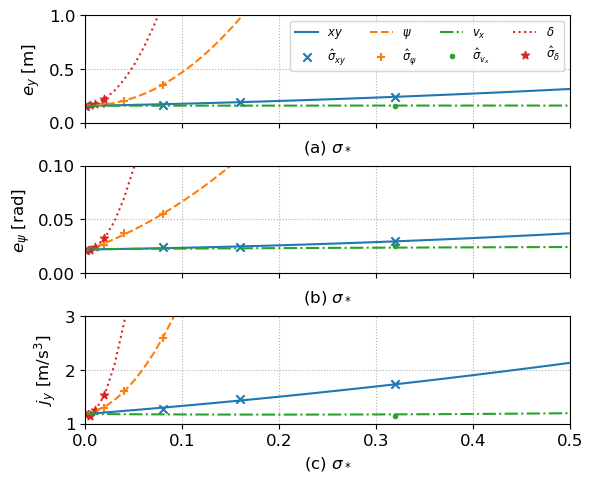

In [13]:
# Set the fontsize to 10
plt.rcParams.update({'font.size': 12})

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14/2.54, 12.5/2.54))
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=0.15, hspace=0.4)

# Your data
x1 = np.array([0.0, 0.08, 0.16, 0.32])#/0.32 # xy
x2 = np.array([0.0, 0.02, 0.04, 0.08])#/0.08 # psi
x3 = np.array([0.0, 0.32, 0.64, 1.28])#/1.28 # vx
x4 = np.array([0.0, 0.005, 0.01, 0.02])#/0.02 # sigma

# whisker values
y1_ey = np.array([0.1597, 0.1644, 0.1976, 0.2402])
y2_ey = np.array([0.1597, 0.178, 0.1982, 0.3542])
y3_ey = np.array([0.1597, 0.1563, 0.1622, 0.1534])
y4_ey = np.array([0.1597, 0.1687, 0.1734, 0.221])

y1_epsi = np.array([0.0217, 0.0243, 0.0242, 0.0298])
y2_epsi = np.array([0.0217, 0.0261, 0.0372, 0.055])
y3_epsi = np.array([0.0217, 0.0257, 0.0233, 0.0251])
y4_epsi = np.array([0.0217, 0.0216, 0.024, 0.0324])

y1_jy = np.array([1.1895, 1.2723, 1.452, 1.7305])
y2_jy = np.array([1.1895, 1.2898, 1.6108, 2.5922])
y3_jy = np.array([1.1895, 1.1519, 1.2428, 1.5052])
y4_jy = np.array([1.1895, 1.1521, 1.2523, 1.5271])

# Compute a least-squares approximation
c1_ey = np.polyfit(x1, y1_ey, 2)
c2_ey = np.polyfit(x2, y2_ey, 2)
c3_ey = np.polyfit(x3, y3_ey, 2)
c4_ey = np.polyfit(x4, y4_ey, 2)

c1_epsi = np.polyfit(x1, y1_epsi, 2)
c2_epsi = np.polyfit(x2, y2_epsi, 2)
c3_epsi = np.polyfit(x3, y3_epsi, 2)
c4_epsi = np.polyfit(x4, y4_epsi, 2)

c1_jy = np.polyfit(x1, y1_jy, 2)
c2_jy = np.polyfit(x2, y2_jy, 2)
c3_jy = np.polyfit(x3, y3_jy, 2)
c4_jy = np.polyfit(x4, y4_jy, 2)

p1_ey = np.poly1d(c1_ey)
p2_ey = np.poly1d(c2_ey)
p3_ey = np.poly1d(c3_ey)
p4_ey = np.poly1d(c4_ey)

p1_epsi = np.poly1d(c1_epsi)
p2_epsi = np.poly1d(c2_epsi)
p3_epsi = np.poly1d(c3_epsi)
p4_epsi = np.poly1d(c4_epsi)

p1_jy = np.poly1d(c1_jy)
p2_jy = np.poly1d(c2_jy)
p3_jy = np.poly1d(c3_jy)
p4_jy = np.poly1d(c4_jy)

# Generate a range of x-values
x_values = np.linspace(0, 1, 100)

# Generate y-values for the least squares line at these x-values
y_lsr1_ey = p1_ey(x_values)
y_lsr2_ey = p2_ey(x_values)
y_lsr3_ey = p3_ey(x_values)
y_lsr4_ey = p4_ey(x_values)

y_lsr1_epsi = p1_epsi(x_values)
y_lsr2_epsi = p2_epsi(x_values)
y_lsr3_epsi = p3_epsi(x_values)
y_lsr4_epsi = p4_epsi(x_values)

y_lsr1_jy = p1_jy(x_values)
y_lsr2_jy = p2_jy(x_values)
y_lsr3_jy = p3_jy(x_values)
y_lsr4_jy = p4_jy(x_values)

# Plot the least squares line
ax1.plot(x_values, y_lsr1_ey, label='$xy$', linestyle='solid')
ax1.scatter(x1, y1_ey, label='$\hat{\sigma}_{xy}$', marker='x')
ax1.plot(x_values, y_lsr2_ey, label='$\psi$', linestyle='dashed')
ax1.scatter(x2, y2_ey, label='$\hat{\sigma}_{\psi}$', marker='+')
ax1.plot(x_values, y_lsr3_ey, label='$v_x$', linestyle='dashdot')
ax1.scatter(x3, y3_ey, label='$\hat{\sigma}_{v_x}$', marker='.')
ax1.plot(x_values, y_lsr4_ey, label='$\delta$', linestyle='dotted')
ax1.scatter(x4, y4_ey, label='$\hat{\sigma}_{\delta}$', marker='*')
ax1.set_xlim([0, 0.5])
ax1.set_ylim([0, 1])
ax1.set_yticks([0, 0.5, 1])
ax1.set_xlabel('(a) $\sigma_*$')
ax1.set_ylabel('$e_y$ [m]')
ax1.set_xticklabels([])  # Remove x-axis tick labels
ax1.grid(True, linestyle='dotted')
ax1.legend(loc='upper right', ncol=4, fontsize='x-small')

ax2.plot(x_values, y_lsr1_epsi, label='$xy$', linestyle='solid')
ax2.scatter(x1, y1_epsi, label='$\hat{\sigma}_{xy}$', marker='x')
ax2.plot(x_values, y_lsr2_epsi, label='$\psi$', linestyle='dashed')
ax2.scatter(x2, y2_epsi, label='$\hat{\sigma}_{\psi}$', marker='+')
ax2.plot(x_values, y_lsr3_epsi, label='$v_x$', linestyle='dashdot')
ax2.scatter(x3, y3_epsi, label='$\hat{\sigma}_{v_x}$', marker='.')
ax2.plot(x_values, y_lsr4_epsi, label='$\delta$', linestyle='dotted')
ax2.scatter(x4, y4_epsi, label='$\hat{\sigma}_{\delta}$', marker='*')
ax2.set_xlim([0, 0.5])
ax2.set_ylim([0, 0.1])
ax2.set_yticks([0, 0.05, 0.1])
ax2.set_xlabel('(b) $\sigma_*$')
ax2.set_ylabel('$e_{\psi}$ [rad]')
ax2.set_xticklabels([])  # Remove x-axis tick labels
ax2.grid(True, linestyle='dotted')

ax3.plot(x_values, y_lsr1_jy, label='$xy$', linestyle='solid')
ax3.scatter(x1, y1_jy, label='$\hat{\sigma}_{xy}$', marker='x')
ax3.plot(x_values, y_lsr2_jy, label='$\psi$', linestyle='dashed')
ax3.scatter(x2, y2_jy, label='$\hat{\sigma}_{\psi}$', marker='+')
ax3.plot(x_values, y_lsr3_jy, label='$v_x$', linestyle='dashdot')
ax3.scatter(x3, y3_jy, label='$\hat{\sigma}_{v_x}$', marker='.')
ax3.plot(x_values, y_lsr4_jy, label='$\delta$', linestyle='dotted')
ax3.scatter(x4, y4_jy, label='$\hat{\sigma}_{\delta}$', marker='*')
ax3.set_xlim([0, 0.5])
ax3.set_ylim([1, 3])
ax3.set_yticks([1, 2, 3])
ax3.set_xlabel('(c) $\sigma_*$')
ax3.set_ylabel('$j_y$ [m/s$^3$]')
# ax3.set_xticklabels([])  # Remove x-axis tick labels
ax3.grid(True, linestyle='dotted')

plt.show()

In [14]:
# Generate y-values for the least squares line at the original x-values
# y_fit = polynomial(x)

# # Compute residuals
# residuals = y - y_fit

# # Compute root mean squared error
# rmse = np.sqrt(np.mean(residuals**2))

# # Compute R-squared value
# ss_res = np.sum(residuals**2)
# ss_tot = np.sum((y - np.mean(y))**2)
# r_squared = 1 - (ss_res / ss_tot)

# print('Coefficients:', coefficients)
# print('Residuals:', residuals)
# print('RMSE:', rmse)
# print('R-squared:', r_squared)